In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from utils import *

In [2]:
# Load the dataset
biomass_data = pd.read_csv('site_data.csv')

Analysis can be done by 1) clustering products, or by 2)clustering on location, and then identifying which location clusters products appear in. To complete 1) we work with the transposed dataframe, where products are on the rows. To complete 2), work with the data frame as is.(note axes and transposes)

## 1) clustering on products

In [3]:
#1) Clustering products

# Transpose the DataFrame to have products as rows and locations as columns
data_transposed = biomass_data.set_index(['dataset', 'site_name', 'site_id', 'X', 'Y']).T

# Remove non-numeric rows
data_transposed_numeric = data_transposed.select_dtypes(include=[np.number])

# Replace 'NA' with NaN
data_transposed_numeric = data_transposed_numeric.replace('NA', np.nan)

# Drop rows with all NaN values
data_transposed_numeric = data_transposed_numeric.dropna(axis=1, how='all')

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
# Impute missing values with ROW mean (must use transposed df and axis=1 for rows)
data_imputed = data_transposed_numeric.T.fillna(data_transposed_numeric.mean(axis=1)).T

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

#hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = cluster.fit_predict(data_scaled)

# # kmeans clustering
# cluster = KMeans(n_clusters=5)
# clusters = cluster.fit_predict(data_scaled)

# DBSCAN clustering
# dbscan = DBSCAN(eps=0.3, min_samples=4)  # Adjust the parameters as needed
# clusters = dbscan.fit_predict(data_scaled)

In [5]:
# Add cluster labels to the transposed DataFrame, for 1)
data_imputed.loc[:,'cluster'] = clusters

# Transpose the data back to the original format
biomass_data_clustered = data_imputed.reset_index()
biomass_data_clustered

dataset               index               NEON  \
site_name                       Harvard Forest   
site_id                                   HARV   
X                           -72.17265999999995   
Y                            42.53690000000006   
0                   ESA CCI          21.046901   
1           Chopping et al.          18.783055   
2                  GEDI L4B         164.080719   
3                Liu et al.          37.921211   
4                    LT-GNN          31.403246   
5          Menlove & Healey         114.922806   
6                 Xu et al.          69.325028   

dataset                                               \
site_name Smithsonian Conservation Biology Institute   
site_id                                         SCBI   
X                                 -78.13949999999994   
Y                                  38.89292000000006   
0                                          21.046901   
1                                          18.783055   
2                                         334.279755   
3                                         115.212837   
4                                          31.403246   
5                                         106.782768   
6                                          69.325028   

dataset                                                         \
site_name Ordway-Swisher Biological Station             UNDERC   
site_id                                OSBS               UNDE   
X                        -81.99342999999999 -89.53724999999997   
Y                         29.68927000000008  46.23388000000006   
0                                 21.046901          21.046901   
1                                 18.783055          18.783055   
2                                 63.379155         155.069643   
3                                 69.890287         139.331772   
4                                 31.403246          31.403246   
5                                 42.734001          91.699257   
6                                 69.325028          69.325028   

dataset                                                        \
site_name Konza Prairie Biological Station          Oak Ridge   
site_id                               KONZ               ORNL   
X                                -96.56309 -84.28259999999995   
Y                        39.10077000000007  35.96412000000004   
0                                21.046901          21.046901   
1                                18.783055          18.783055   
2                                 7.477551         162.482702   
3                                10.838812          91.845345   
4                                31.403246          31.403246   
5                                10.135107         115.705890   
6                                69.325028          69.325028   

dataset                                                 \
site_name Talladega National Forest          Woodworth   
site_id                        TALL               WOOD   
X                -87.39326999999997 -99.24135599999994   
Y                 32.95046000000008  47.12822800000004   
0                         21.046901          21.046901   
1                         18.783055          18.783055   
2                        228.355491           4.161302   
3                         85.784576           9.719982   
4                         31.403246          31.403246   
5                        125.903267           0.000000   
6                         69.325028          69.325028   

dataset                                      ...  \
site_name Central Plains Experimental Range  ...   
site_id                                CPER  ...   
X                            -104.745602469  ...   
Y                         40.81553413400008  ...   
0                                 21.046901  ...   
1                                  0.000000  ...   
2                                  1.268689  ...   
3                                  9.62

In [6]:
clusters
if -1 in clusters:
    print("noise found during clustering, contained in cluster -1")

In [7]:
# Save the clustering results to a CSV file
biomass_data_clustered.to_csv('clustering_product_agglo_prod.csv', index=False)

biomass_data_clustered has more columns than rows, clustering occured on products
Cluster 2 contains multiple products, plotting heatmap...
Cluster 0 contains multiple products, plotting heatmap...


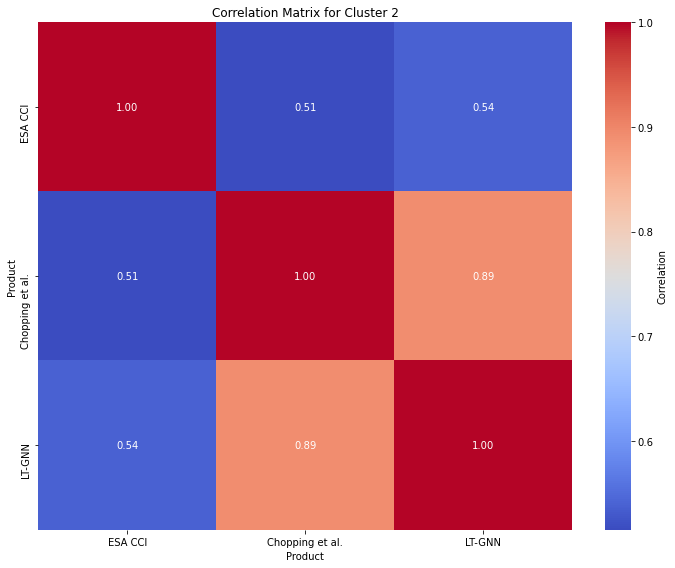

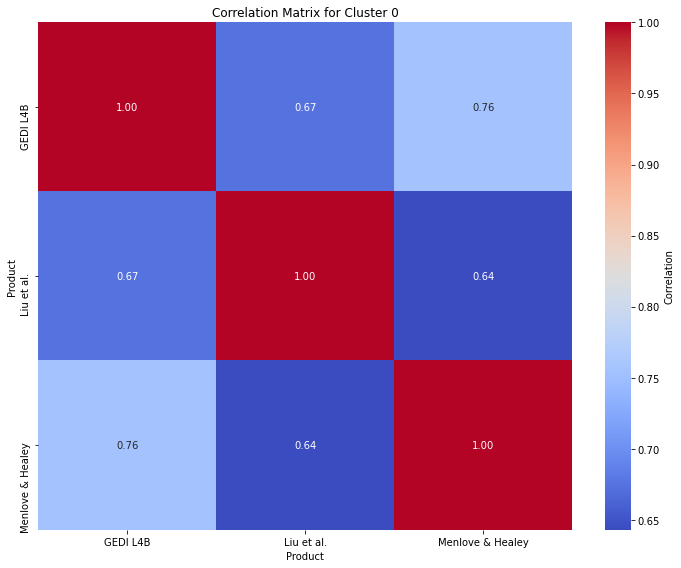

In [8]:
# Heatmap visualization

# Load the dataset
# biomass_data_clustered = pd.read_csv('clustering_product_type.csv')

# List of products
products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']

corr_matrix=plot_heat_by_clus(biomass_data_clustered,products)

In [9]:
# METRICS

# Extract predicted cluster labels
predicted_labels = biomass_data_clustered['cluster']

print_indices(data_scaled, predicted_labels)

Silhouette Coefficient: 0.22890319328004938
Calinski-Harabasz Index: 4.119086607194342
Davies-Bouldin Index: 0.8237222880542179


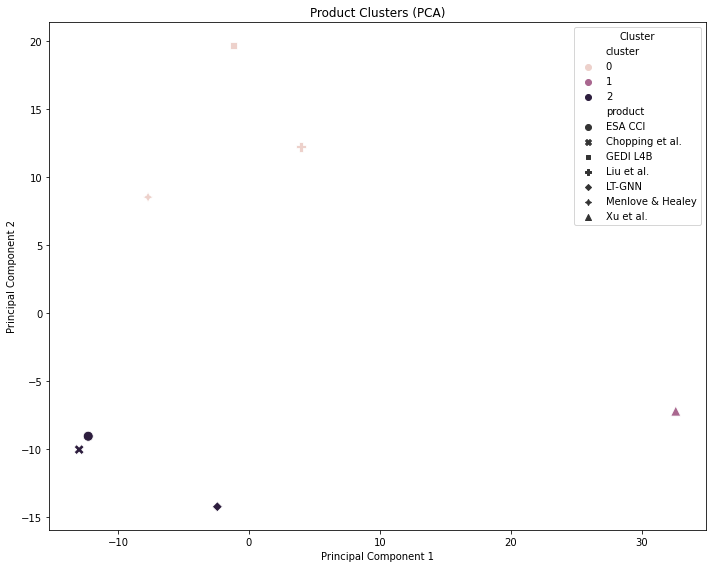

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# List of products
products = ['ESA CCI', 'Chopping et al.', 'GEDI L4B', 'Liu et al.', 'LT-GNN', 'Menlove & Healey', 'Xu et al.']

# Filter the data to include only the desired products
data_products = biomass_data_clustered[biomass_data_clustered['index'].isin(products)]

# Prepare the data for PCA
X = data_products.select_dtypes(include=[np.number])
X = X.fillna(X.mean())  # Fill missing values with column means

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = data_products['cluster']
pca_df['product'] = data_products['index']

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', style='product', s=100)
plt.title('Product Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()